# 1. Deep Learning for Vision

**Upside down detector**: Train a model to detect if images are upside down

* Pick a dataset of natural images (we suggest looking at datasets on the [Kaggle Datasets](https://www.kaggle.com/datasets?search=Image+Classification))
* Synthetically turn some of images upside down. Create a training and test set.
* Build a neural network (using Tensorflow, PyTorch, or any framework you like)
* Train it to classify image orientation until a reasonable accuracy is reached
* Look at some of the images that were classified incorrectly. Please explain what you might do to improve your model's performance on these images in the future (you do not need to impelement these suggestions)

**Submission instructions**: Please write your code below and include some examples of images that were classified

In [ ]:
### WRITE YOUR CODE TO TRAIN THE MODEL HERE

#Kaggle Dataset

Dataset Link: https://www.kaggle.com/datasets/aseemdandgaval/23-pet-breeds-image-classification

#Importing Libraries

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix
from os.path import splitext
import seaborn as sns
import glob
import shutil

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Preparing & Preprocessing Dataset 

In [ ]:
dataSet_dir = '/content/drive/MyDrive/Pet_Breeds'

In [ ]:
os.listdir(dataSet_dir)

['rottwiler',
 'pomeranian',
 'ragdoll cat',
 'yorkshire terrier',
 'persian cat',
 'shiba inu',
 'pug',
 'sphynx',
 'mumbai cat',
 'siamese cat',
 'maine coon',
 'husky',
 'german shepherd',
 'dachshund',
 'boxer',
 'golden retriever',
 'labrador',
 'bulldog',
 'chihuahua',
 'corgi',
 'abyssinian',
 'american shorthair',
 'beagle']

In [ ]:
new_dir= '/content/drive/MyDrive/Pet_Breeds_Updated'
sub_dir= ["Train","Test","Validation"]
label_dir= ["Normal Pixs","UpsideDown Pixs"]

new_dir= os.path.join(dataSet_dir, new_dir)
os.mkdir(new_dir)

for subDir in sub_dir:
  for lbl in label_dir:
    os.makedirs(new_dir + '/' + subDir + '/' + lbl)


FileExistsError: ignored

In [ ]:
os.listdir(new_dir)

['Train', 'Test', 'Validation']

In [ ]:
breed =['persian cat',
 'siamese cat',
 'ragdoll cat',
 'sphynx',
 'yorkshire terrier',
 'pomeranian',
 'mumbai cat',
 'shiba inu',
 'pug',
 'rottwiler',
 'bulldog',
 'maine coon',
 'dachshund',
 'german shepherd',
 'corgi',
 'boxer',
 'golden retriever',
 'husky',
 'chihuahua',
 'labrador',
 'beagle',
 'abyssinian',
 'american shorthair']

In [ ]:
# Converting jpg or jpeg images into png images to avoid any misconception of image format in further analysis
for i in range(23):
  img_pth =dataSet_dir+'/'+ breed[i]
  for img in os.listdir(img_pth):
    input_img = os.path.join(img_pth, img)
    png = '.png'
    jpg= '.jpg'
    jpeg='.jpeg'
    imgName, extension=splitext(input_img)
    if(extension==jpg or extension==jpeg):
      img_loc=Image.open(imgName + extension)
      img_loc.save(imgName+png)

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [ ]:
# Copying png format images from dataSet_dir to newly created directory while splitting the images into train, test and validation folder
for i in range(23):
  inputImgFold = dataSet_dir+ '/' + breed[i]
  for imgfile in glob.iglob(os.path.join(inputImgFold, "*.png")):
    for subDir in sub_dir:
      outputImgFold= new_dir+'/' + subDir +'/Normal Pixs'
      if (i<=16 and subDir=='Train'):
        shutil.copy(imgfile, outputImgFold)
      elif (16<i<=19 and subDir=='Test'):
        shutil.copy(imgfile, outputImgFold)
      elif (19<i<=22 and subDir=='Validation'):
        shutil.copy(imgfile, outputImgFold)

In [ ]:
print(len(os.listdir(new_dir+ '/Validation'+ '/Normal Pixs')))
print(len(os.listdir(new_dir+ '/Train'+ '/Normal Pixs')))
print(len(os.listdir(new_dir+ '/Test'+ '/Normal Pixs')))

509
2818
501


In [ ]:
def img_rotation(inputFileLoc, outputFileLoc, imgFileLoc):
  inputPic = os.path.join(inputFileLoc, imgFileLoc)
  org_img= Image.open(inputPic)
  outputPic= os.path.join(outputFileLoc, 'inv_'+imgFileLoc)
  rgb_img=org_img.convert('RGB')
  rot_img = rgb_img.rotate(180)
  updated_img= rot_img.save(outputPic)
   # print(outputPic)
   
  return updated_img

In [ ]:
# Synthetically turnning some of images upside down with the following ratio(Train:35%, Test and Validation: 40% approx.)
for subDir in sub_dir:
    inputPixFile= new_dir+'/' + subDir +'/Normal Pixs'
    outputPixFile = new_dir+'/' + subDir +'/UpsideDown Pixs'
    if (subDir=='Train'):
        for imgPath in sorted(os.listdir(inputPixFile))[:1000]:
          img_rotation(inputPixFile, outputPixFile, imgPath)
    elif (subDir=='Test'):
        for imgPath in sorted(os.listdir(inputPixFile))[:215]:
          img_rotation(inputPixFile, outputPixFile, imgPath)
    elif (subDir=='Validation'):
        for imgPath in sorted(os.listdir(inputPixFile))[:215]:
          img_rotation(inputPixFile, outputPixFile, imgPath)

In [ ]:
print(len(os.listdir(new_dir+ '/Validation'+ '/UpsideDown Pixs')))
print(len(os.listdir(new_dir+ '/Train'+ '/UpsideDown Pixs')))
print(len(os.listdir(new_dir+ '/Test'+ '/UpsideDown Pixs')))

215
1000
215


##Loading Datset

In [ ]:
img_height=200
img_width=200
imgSize=(img_height,img_width)
epoch=15
newData_dir = '/content/drive/MyDrive/Pet_Breeds_Updated'
os.listdir(newData_dir)

['Train', 'Test', 'Validation']

In [ ]:
print(len(os.listdir(newData_dir+ '/Validation'+ '/UpsideDown Pixs')))
print(len(os.listdir(newData_dir+ '/Train'+ '/UpsideDown Pixs')))
print(len(os.listdir(newData_dir+ '/Test'+ '/UpsideDown Pixs')))

215
1000
215


In [ ]:
label_direc = {'Normal Pixs':0, 'UpsideDown Pixs':1}

#loading data into memory disk
def load_Data():
  sub_dirr= ["Train","Test","Validation"]
  output=[]
  for subDirec in sub_dirr:
    parent_path= os.path.join(newData_dir, subDirec)
    print(parent_path)
    opimgs=[]
    opLbls=[]

    for lbl_folder in os.listdir(parent_path):
      target_lbls= label_direc[lbl_folder]
      child_path= os.path.join(parent_path, lbl_folder) #assigning labeled folders to Train, Validation and Test folders

      #Iterating through each image in child path
      for lbl_file in os.listdir(child_path):
         #assigning images to related child path folders
        img_path=os.path.join(child_path, lbl_file)
        #Open each img and resize to a constant size of h*w as defined earlier
        img= cv2.imread(img_path)
        # img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img= cv2.resize(img, imgSize)

        #Append imgs and labels to output images and labels
        opimgs.append(img)
        opLbls.append(target_lbls)

    # For easy manipulation & processing transforming labels & imgs to numpy
    opimgs=np.array(opimgs, dtype='float32')
    opLbls=np.array(opLbls, dtype='int32')

    output.append((opimgs,opLbls))

  return output

In [ ]:
(img_train, lbl_train), (img_test, lbl_test), (img_valid, lbl_valid) = load_Data()

/content/drive/MyDrive/Pet_Breeds_Updated/Train
/content/drive/MyDrive/Pet_Breeds_Updated/Test
/content/drive/MyDrive/Pet_Breeds_Updated/Validation


In [ ]:
img_train.shape

(3818, 200, 200, 3)

In [ ]:
lbl_train.shape

(3818,)

In [ ]:
#Performing One_Hot_Encoding to transform labeled data into categorical data
lblTrain=to_categorical(lbl_train)
lblValid=to_categorical(lbl_valid)
lblTest=to_categorical(lbl_test)

In [ ]:
lbl_test.shape

(716,)

In [ ]:
print('Shape of Training Images: ', img_train.shape)
print('Shape of Validation Images: ', img_valid.shape)
print('Shape of Testing Images: ', img_test.shape)
print('Shape of Training Labels: ', lblTrain.shape)
print('Shape of Validation Labels: ', lblValid.shape)
print('Shape of Testing Labels: ', lblTest.shape)

Shape of Training Images:  (3818, 200, 200, 3)
Shape of Validation Images:  (724, 200, 200, 3)
Shape of Testing Images:  (716, 200, 200, 3)
Shape of Training Labels:  (3818, 2)
Shape of Validation Labels:  (724, 2)
Shape of Testing Labels:  (716, 2)


## Visulizing Training Datset

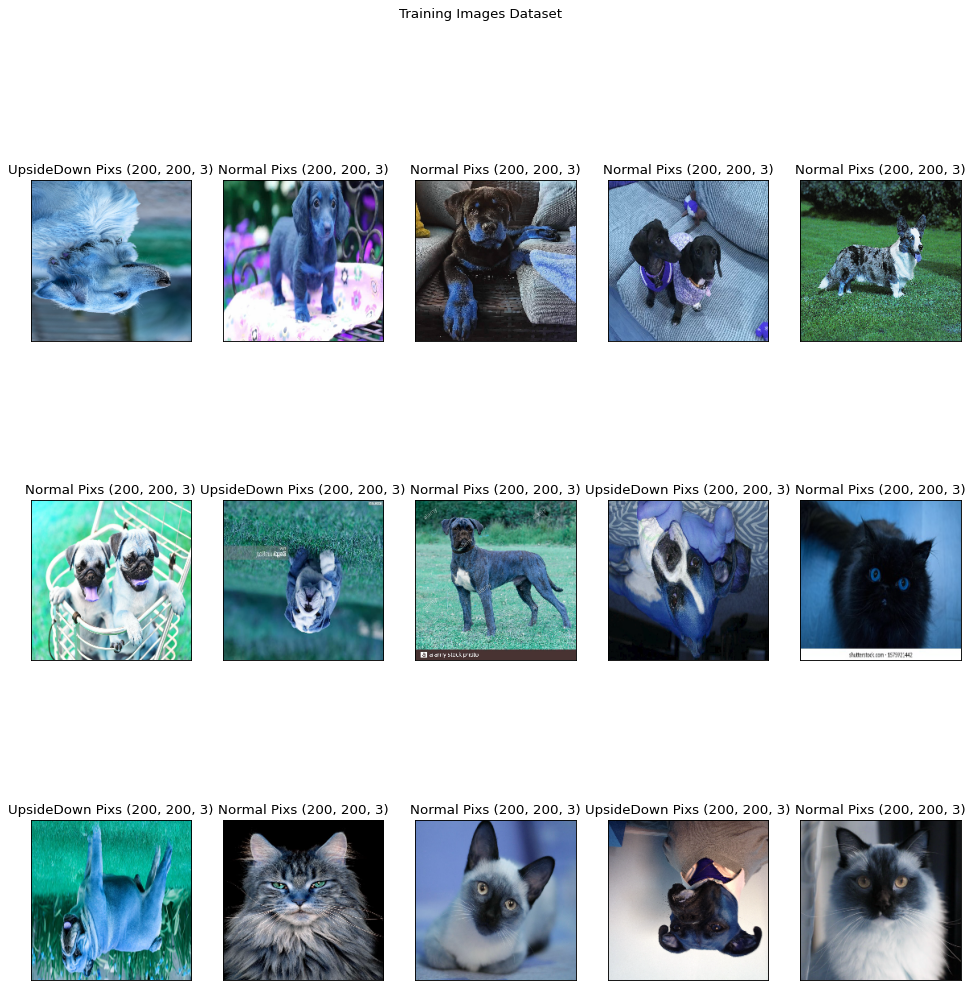

In [ ]:
lbl_directory = {0:"UpsideDown Pixs", 1:"Normal Pixs"}

display_imgSize=(15,15) #resizing images for collective view
d_img=plt.figure(figsize=display_imgSize, dpi=80)
d_img.suptitle("Training Images Dataset", fontsize=12)
for i in range(15):
    plt.subplot(3, 5, i+1) #Displaying 15 imgs in 3 rows and 5 columns
    img_shape=img_train[i].shape
    img_indx=np.random.randint(img_train.shape[0])
    plt.grid(False)
    plt.axis('on')
    plt.imshow(img_train[img_indx].astype(np.uint8))
    plt.title('{} {}'.format(lbl_directory[lblTrain[img_indx][0]], img_shape))
    plt.xticks([])
    plt.yticks([])

plt.show()

# CNN Model Building

In [ ]:
cnn_model=Sequential([
    #1st Convolution Layer
    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation='leaky_relu', input_shape=(img_height,img_width,3)),
    MaxPooling2D(pool_size=(2,2)),
    #2nd Convolution Layer
    Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='leaky_relu'),
    MaxPooling2D(pool_size=(2,2)),
    #3rd Convolution Layer
    Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='leaky_relu'),
    MaxPooling2D(pool_size=(2,2)),
    #4th Convolution Layer
    Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid', activation='leaky_relu'),
    MaxPooling2D(pool_size=(2,2)),
    # #5th Convolution Layer
    Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='valid', activation='leaky_relu'),
    MaxPooling2D(pool_size=(2,2)),
    # # Dropout(0.2),
    Flatten(),
    Dense(256,activation='leaky_relu'),
    #Output Layer
    Dense(2, activation='sigmoid')
])

In [ ]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 99, 99, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 23, 23, 32)      

In [ ]:
# Evaluating training performance of model and plotting relevant graphs for accuracy and loss functions
hist_cnn = cnn_model.fit(img_train, lbl_train, batch_size= 16 ,epochs= epoch, validation_split=0.0,validation_data=(img_valid,lbl_valid))

Epoch 1/15
239/239 [==============================] - 5s 17ms/step - loss: 2.8991 - accuracy: 0.7412 - val_loss: 0.4692 - val_accuracy: 0.7914
Epoch 2/15
239/239 [==============================] - 4s 16ms/step - loss: 0.4279 - accuracy: 0.8114 - val_loss: 0.4471 - val_accuracy: 0.7776
Epoch 3/15
239/239 [==============================] - 4s 16ms/step - loss: 0.3555 - accuracy: 0.8486 - val_loss: 0.4850 - val_accuracy: 0.7914
Epoch 4/15
239/239 [==============================] - 4s 16ms/step - loss: 0.3226 - accuracy: 0.8649 - val_loss: 0.4771 - val_accuracy: 0.7707
Epoch 5/15
239/239 [==============================] - 4s 16ms/step - loss: 0.2684 - accuracy: 0.8916 - val_loss: 0.5530 - val_accuracy: 0.7583
Epoch 6/15
239/239 [==============================] - 4s 16ms/step - loss: 0.2504 - accuracy: 0.8921 - val_loss: 0.5316 - val_accuracy: 0.7859
Epoch 7/15
239/239 [==============================] - 4s 16ms/step - loss: 0.2214 - accuracy: 0.9086 - val_loss: 0.8748 - val_accuracy: 0.7320

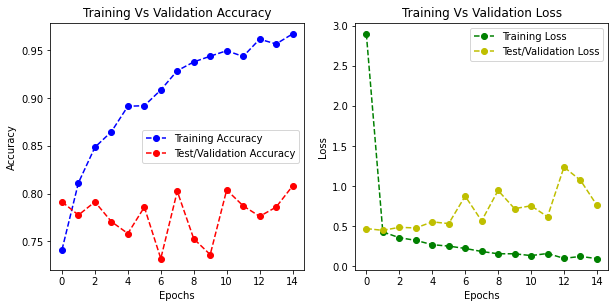

In [ ]:
train_acc=hist_cnn.history['accuracy']
train_loss=hist_cnn.history['loss']

test_acc=hist_cnn.history['val_accuracy']
test_loss=hist_cnn.history['val_loss']

plt.figure(figsize=(10,10))
#Plotting Accuracy 
plt.subplot(2,2,1)
plt.plot(train_acc,'bo--', label='Training Accuracy')
plt.plot(test_acc, 'ro--',label='Test/Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.title('Training Vs Validation Accuracy')

#Plotting Loss
plt.subplot(2,2,2) 
plt.plot(train_loss,'go--', label='Training Loss')
plt.plot(test_loss, 'yo--',label='Test/Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.title('Training Vs Validation Loss')
plt.show()

In [ ]:
model_eval= cnn_model.evaluate(img_test, lbl_test)

23/23 [==============================] - 0s 16ms/step - loss: 0.6926 - accuracy: 0.8101


In [ ]:
#Model prediction on test dataset and evaluating classification metrices(precision. recall and f1-score)
lbl_true=np.argmax(lblTest,axis=1)
lbl_pred = np.argmax(cnn_model.predict(img_test), axis=-1)
print("CNN Model Classification Report: \n",classification_report(lbl_true,lbl_pred,target_names=label_direc))

CNN Model Classification Report: 
                  precision    recall  f1-score   support

    Normal Pixs       0.83      0.92      0.87       501
UpsideDown Pixs       0.74      0.56      0.64       215

       accuracy                           0.81       716
      macro avg       0.79      0.74      0.76       716
   weighted avg       0.80      0.81      0.80       716



Text(91.68, 0.5, 'Actual')

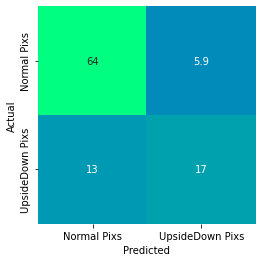

In [ ]:
cm=confusion_matrix(lbl_true, lbl_pred) 
cm_percent=(cm/np.sum(cm))*100
sns.heatmap(cm_percent, cmap='winter', center=0, square=True, annot=True, xticklabels=label_direc, yticklabels=label_direc, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')

#Write Up & Conclusion

**Write up**: 
* Include some examples of misclassified images. Please explain what you might do to improve your model's performance on these images in the future (you do not need to impelement these suggestions)

In [ ]:
misclass_img= img_test[lbl_pred!=lbl_true]
misclass_true=lbl_true[lbl_pred!=lbl_true]
misclass_pred=lbl_pred[lbl_pred!=lbl_true]

print("No. of Misclassified Images: ", misclass_img.shape[0])
print("No. of Misclassified True Labels: ", misclass_true.shape[0])
print("No. of Misclassified Predicted Labels: ", misclass_pred.shape[0])

No. of Misclassified Images:  136
No. of Misclassified True Labels:  136
No. of Misclassified Predicted Labels:  136


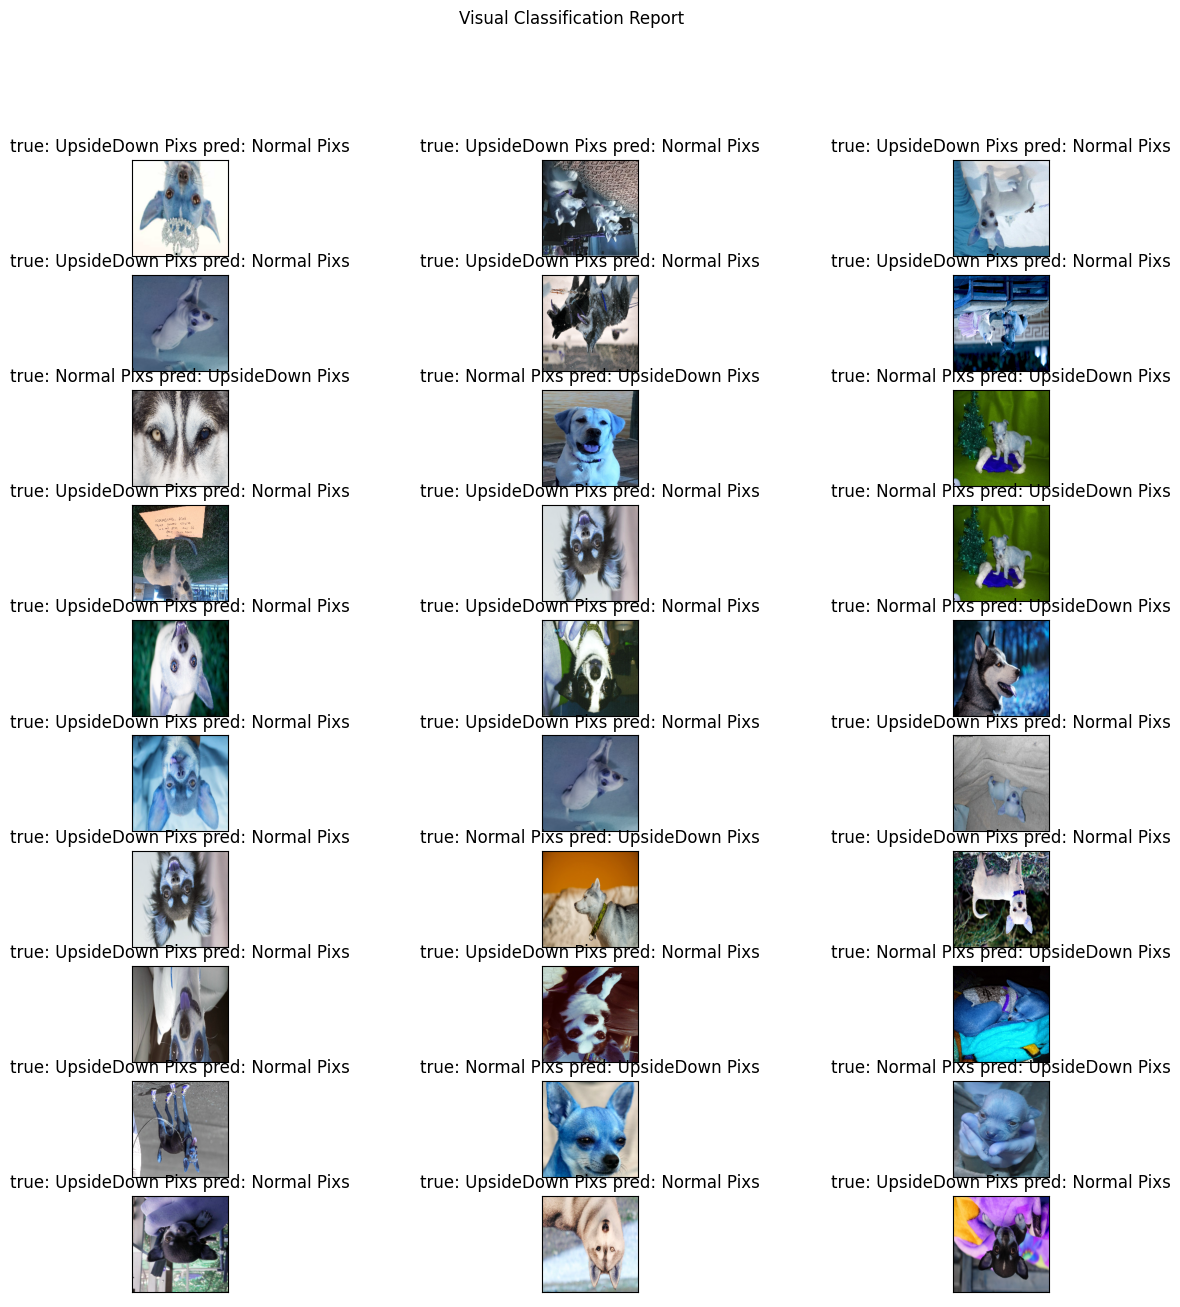

In [ ]:
lbl_direct = {1:"UpsideDown Pixs", 0:"Normal Pixs"}

imgSize=(15,15) #resizing images for collective view
dim_img=plt.figure(figsize=imgSize, dpi=100)
dim_img.suptitle("Visual Classification Report", fontsize=12)
for i in range(30):
    plt.subplot(10, 3, i+1) #Displaying 30 imgs in 10 rows and 3 columns
    index=np.random.randint(misclass_img.shape[0])
    plt.imshow(misclass_img[index].astype(np.uint8))
    plt.title('true: {} pred: {}'.format(lbl_direct[misclass_true[index]], lbl_direct[misclass_pred[index]]))

    # plt.xlabel(
    #     "Actual Label:" + lbl_direct[misclass_true[index]]+ "\n"
    #     "Predicted Label:" + lbl_direct[misclass_pred[index]]
    #     # "Predict: "+ lbl_pred.argmax(axis=1)[0]
    # ) 

    # plt.ylabel(
    #     "Actual Label:" + lbl_direct[misclass_true[index]]
    # )
    plt.xticks([])
    plt.yticks([])

plt.show()

**Concluding Remarks**: 

The accuracy and loss graphs obtained shows that the model is overfitting, with an average difference of 20% accuracy rate. Whereas validation accuracy fluctuates between 74% and 80% and validation loss lies between 0.46 and 1.02. Furthermore, a minor rise in validation loss is detected in the last few epochs. On test (unseen) data, overall accuracy is 81 percent. Individual class accuracy observed from the confusion matrix is 64% for the Normal Pixs class and 17% for the UpsideDown Pixs class. Furthermore, overall classification metrics indicates that the class Normal Pixs has superior classification outcomes than the class UpsideDown Pixs. 

Initially, the model performed poorly, with an average accuracy slightly higher than 60% and a high loss rate on the validation set. To overcome it, the number of layers, hidden neurons, and finally the activation function were changed from ReLu to Leaky ReLu.

Several techniques like regularization, weight initialization, normalization etc to completely eradicate model overfitting are yet to be implemented; additionally, class imbalance is evident, which can be eliminated by up sampling data for the UpsideDown Pixs class. Finally, a little hyperparameter tweaking will improve the model's performance significantly.

